This approach uses the first frame as movement reference. So the video doesn't work if there is already movement. Also parked cars who later drive away leave a movement rectangle behind.
Reflections in cars are also still marked.
Humans are not detected on the sidewalk. -> tweak the parameters

In [42]:
import numpy as np
import cv2

cap = cv2.VideoCapture('20190402_142557.mov')

first_frame = None

while(cap.isOpened()):
    ret, frame = cap.read()

    # Grayscale (used for threshold)
    gray = cv2.cvtColor(frame,  cv2.COLOR_BGR2GRAY)

    # Frame Blurring. Reducing noise
    gray = cv2.GaussianBlur(gray, (21, 21), 0)

    # Update static frame
    if first_frame is None:
        first_frame = gray
        continue

    # Calculate difference between first frame and current frame
    diff_frame = cv2.absdiff(first_frame, gray)

    # If change in between first frame and current frame is greater than 30 it will show as white
    # Could tweak with threshold types (https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html). Adaptive threshold for different lightning
    thresh_frame = cv2.threshold(diff_frame, 30, 255, cv2.THRESH_BINARY)[1]

    # Increase area of white
    dilated_frame = cv2.dilate(thresh_frame, None, iterations=5)

    # Find contours
    # Chain approx simple saves memory by only saving the corners
    contours, _ = cv2.findContours(dilated_frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #cv2.drawContours(frame, cnts, -1, (0,255,0), 3)

    # Draw rectangles around contours
    for contour in contours:
        # Calculate the contour area. Skips small countours
        if cv2.contourArea(contour) < 3000:
            continue

        # Calculates center of mass of contour
        # Useful for measure of speed with this point
        # maybe middle of rectancle is more accurate
        M = cv2.moments(contour)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        cv2.circle(frame, (cx, cy), radius=3, color=(0, 0, 255), thickness=-1)
        
        # Returns corners of contour. Doesn't consider the rotation of the object
        (x, y, w, h) = cv2.boundingRect(contour)
        
        # draw rectangle around contour
        rectangle = cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        # Puts text above the rectangle
        cv2.putText(rectangle, 'Motion Detected', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36, 255, 12), 2)

    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
from IPython.display import Video
Video('20190401_185721.mov', width=854, height=480, html_attributes='controls autoplay muted')

In [12]:
from IPython.display import HTML

HTML("""
    <video alt="video" width="854" height="480" autoplay controls muted>
        <source src="20190401_185721.MOV" type="video/mp4">
    </video>
""")

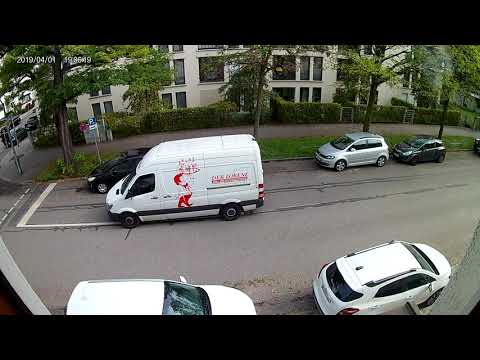

In [36]:
from IPython.display import YouTubeVideo
YouTubeVideo('r1pk0ZpjSI8', width=854, height=480, controls=1, autoplay=1)